In [44]:
from datetime import date
print(date.today())

2020-07-29


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers

In [47]:
data1 = pd.read_csv('20_1_label_audacity_fft_4096.csv')
data2 = pd.read_csv('3_1_label_audacity_fft_4096.csv')
data=pd.merge(data1, data2, how='outer')
data.drop(columns='Time',axis=1,inplace=True)
data.head()
data.shape

(6020, 33)

In [62]:
from sklearn.utils import shuffle
data= shuffle(data)


In [63]:
data['8'].max() , data['8'].min()

(9301.724460805792, 0.008660364423185152)

In [64]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
print(y)


[1 1 0 ... 1 1 1]


# Normalizing

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [66]:
# spliting of dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Simple XGBOOST

In [67]:
y_test.shape

(1204,)

In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

# fit model no training data
model = XGBClassifier( )
model.fit(X_train, y_train)
# make predictions for test data
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)
# evaluate predictions
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0.97925311 0.98442368 0.97819315 0.98130841 0.97819315]
Accuracy: 98.75%


# 5-Fold CV

In [69]:
y_pred.shape , y_test.shape

((1204,), (1204,))

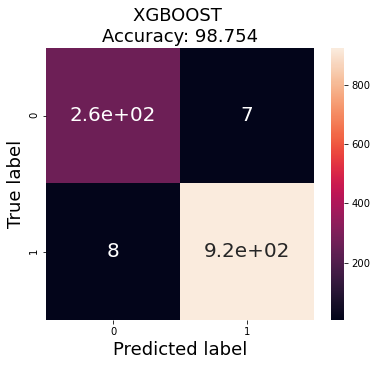

In [70]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])
print()
plt.figure(figsize=(6,5))
sns.heatmap(cm_df,   annot=True , annot_kws={'size':20} )
plt.title('XGBOOST \nAccuracy: {0:.3f}'.format(accuracy_score(y_test, predictions)*100) ,  fontsize=18)
plt.ylabel('True label' , fontsize=18)
plt.xlabel('Predicted label' ,  fontsize=18)
plt.show()